In [1]:
abs(-10)

10

In [2]:
import numpy as np

In [3]:
price = [5000,7000,9000,12000,15000]
area = [100,150,200,250,300]

In [4]:
price_mean = np.mean(price)
area_mean = np.mean(area)

In [5]:
price_mean

9600.0

In [6]:
area_mean

200.0

In [7]:
numerator = np.sum((area-area_mean)*(price - price_mean))

In [8]:
denominator = np.sum(np.square(area-area_mean))

In [9]:
denominator

25000.0

In [10]:
numerator/denominator

50.0

In [11]:
import matplotlib.pyplot as plt

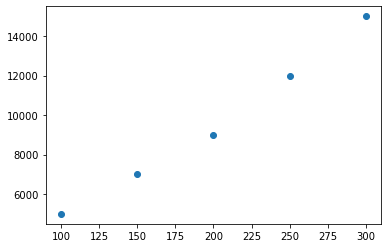

In [12]:
plt.scatter(area,price)
plt.show()

## linea regression example

1) Collect the dependent & independent variables 

2) Calculate the mean of each variables

3) Calculate the variance between the two variables

4) Calculate the covariance between 2 variables

5) Calculate the coefficient of linear regression equation:

    b1 = covariance(x,y) / variance(x)
    b0 = mean(y) - b1 * mean(x)
    
    
6) Use the coefficients to predict the value on the dependent variable

     y_predict = b0 + b1 * x

In [13]:
import numpy as np

x = np.array([1,2,3,4,5])

y = np.array([2,3,4,5,6])

In [14]:
x

array([1, 2, 3, 4, 5])

In [15]:
y

array([2, 3, 4, 5, 6])

In [16]:
avg_x = np.mean(x)

In [17]:
avg_y = np.mean(y)

In [18]:
avg_x

3.0

In [19]:
avg_y

4.0

In [20]:
# calculating the variance

x_var = np.var(x)
y_var = np.var(y)

In [21]:
x_var

2.0

In [22]:
y_var

2.0

In [23]:
cov = np.cov(x,y)[0][1]

In [24]:
cov

2.5

In [25]:
b1 = cov/ x_var

In [26]:
b1

1.25

In [27]:
b0 = avg_y - b1 * avg_x

In [28]:
b0

0.25

In [29]:
x_pred = 5

y_pred = b0+b1*x_pred

In [30]:
y_pred

6.5

In [31]:
import pandas as pd

In [32]:
data = pd.read_csv('linear_reg_sample.csv')

In [33]:
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [34]:
x = data['SAT']
y = data['GPA']

Text(0, 0.5, 'GPA')

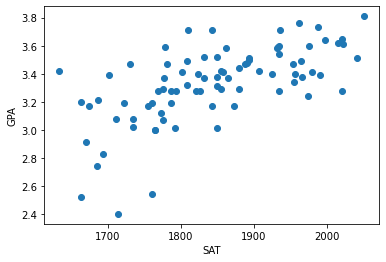

In [35]:
plt.scatter(x,y)
plt.xlabel('SAT')
plt.ylabel('GPA')

In [36]:
sat_mean = np.mean(data['SAT'])

In [37]:
sat_mean

1845.2738095238096

In [38]:
gpa_mean = np.mean(data['GPA'])

In [39]:
gpa_mean

3.330238095238094

In [40]:
sat_var = np.var(data['SAT'])
gpa_var = np.var(data['GPA'])

In [41]:
sat_var

10796.57979024943

In [42]:
gpa_var

0.07289756235827666

In [43]:
cov = np.cov(data['SAT'],data['GPA'])[0][1]

In [44]:
cov

18.091138841078607

In [45]:
b1 = cov /sat_var
b0 = gpa_mean - b1 * sat_mean

In [46]:
b1

0.0016756360988891142

In [47]:
b0

0.23823068766536304

Text(0, 0.5, 'GPA')

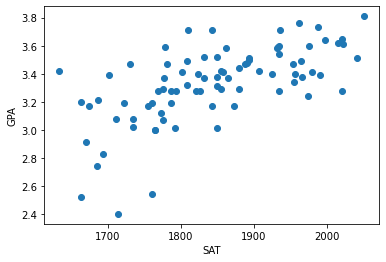

In [48]:
plt.scatter(x,y)
plt.xlabel('SAT')
plt.ylabel('GPA')

In [49]:
gpa_predict = b0+b1*1500

In [50]:
gpa_predict

2.7516848359990345

In [51]:
gpa_predict = b0+b1*1750

In [52]:
gpa_predict

3.170593860721313

In [53]:
gpa_predict = b0+b1*1400

In [54]:
gpa_predict

2.5841212261101227

In [55]:
abs(-1000)

1000

## Project on Linear Regression

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df = pd.read_csv('Housing.csv')

In [58]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [60]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [61]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

<AxesSubplot:xlabel='area', ylabel='price'>

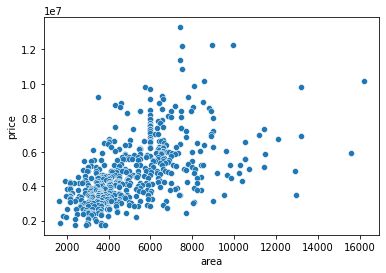

In [62]:
sns.scatterplot(x='area',y='price',data=df)

<AxesSubplot:xlabel='area', ylabel='price'>

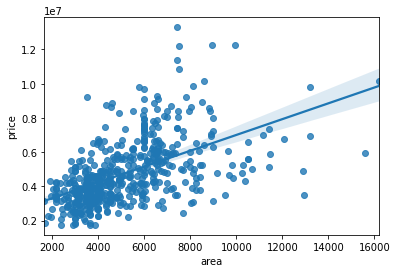

In [63]:
sns.regplot(x='area',y='price',data=df)

/home/punit/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area'>

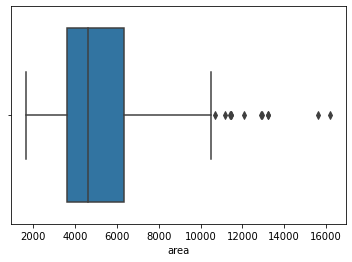

In [64]:
sns.boxplot(df['area'])

<AxesSubplot:xlabel='area', ylabel='Count'>

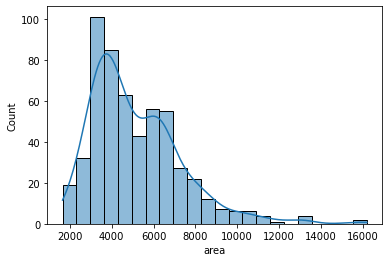

In [65]:
sns.histplot(df['area'],kde=True)

/home/punit/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

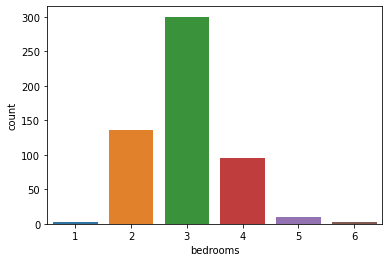

In [66]:
sns.countplot(df['bedrooms'])

/home/punit/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bathrooms', ylabel='count'>

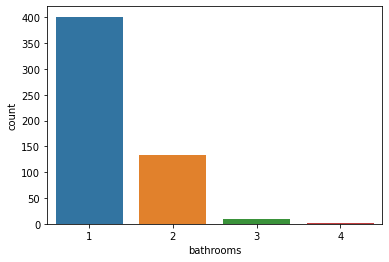

In [67]:
sns.countplot(df['bathrooms'])

/home/punit/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stories', ylabel='count'>

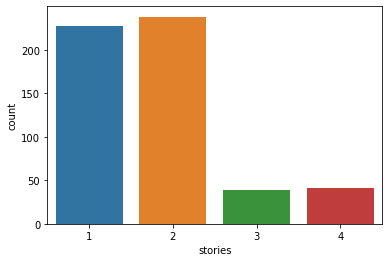

In [68]:
sns.countplot(df['stories'])

/home/punit/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mainroad', ylabel='count'>

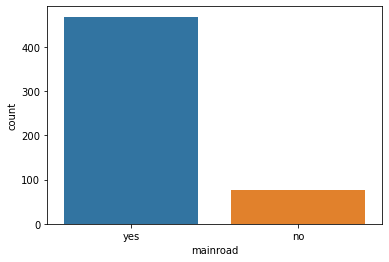

In [69]:
sns.countplot(df['mainroad'])

/home/punit/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='guestroom', ylabel='count'>

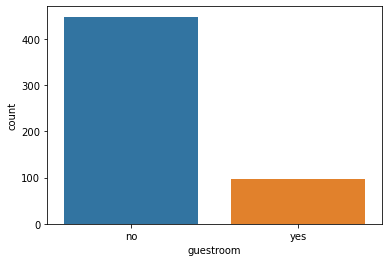

In [70]:
sns.countplot(df['guestroom'])

/home/punit/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='airconditioning', ylabel='count'>

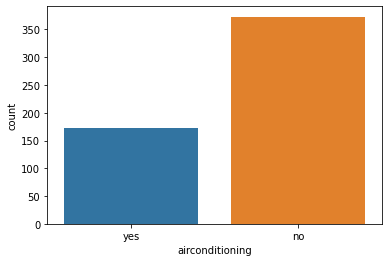

In [71]:
sns.countplot(df['airconditioning'])

/home/punit/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='parking', ylabel='count'>

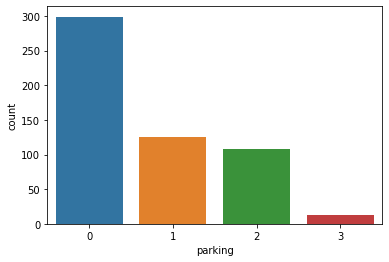

In [72]:
sns.countplot(df['parking'])

In [73]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

## Feature Engineering

In [74]:
input_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']

In [75]:
target = 'price'

In [76]:
input_df = df[input_cols].copy()

In [77]:
input_df

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [78]:
cat_cols = input_df[input_cols].select_dtypes(include='object').columns.to_list()

In [79]:
cat_cols

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [80]:
from sklearn.preprocessing import OneHotEncoder

In [81]:
encoder = OneHotEncoder(sparse=False,handle_unknown='ignore')

In [82]:
type(encoder)

sklearn.preprocessing._encoders.OneHotEncoder

In [83]:
encoder.fit(input_df[cat_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [84]:
encoder_cols = list(encoder.get_feature_names(cat_cols))

In [85]:
encoder_cols

['mainroad_no',
 'mainroad_yes',
 'guestroom_no',
 'guestroom_yes',
 'basement_no',
 'basement_yes',
 'hotwaterheating_no',
 'hotwaterheating_yes',
 'airconditioning_no',
 'airconditioning_yes',
 'prefarea_no',
 'prefarea_yes',
 'furnishingstatus_furnished',
 'furnishingstatus_semi-furnished',
 'furnishingstatus_unfurnished']

In [86]:
input_df[encoder_cols] = encoder.transform(input_df[cat_cols])

In [93]:
input_df

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,yes,no,no,no,yes,2,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,8960,4,4,4,yes,no,no,no,yes,3,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,9960,3,2,2,yes,no,yes,no,no,2,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,7500,4,2,2,yes,no,yes,no,yes,3,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,7420,4,1,2,yes,yes,yes,no,yes,2,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
541,2400,3,1,1,no,no,no,no,no,0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
542,3620,2,1,1,yes,no,no,no,no,0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
543,2910,3,1,1,no,no,no,no,no,0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [94]:
input_df.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus', 'mainroad_no', 'mainroad_yes', 'guestroom_no',
       'guestroom_yes', 'basement_no', 'basement_yes', 'hotwaterheating_no',
       'hotwaterheating_yes', 'airconditioning_no', 'airconditioning_yes',
       'prefarea_no', 'prefarea_yes', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [95]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   area                             545 non-null    int64  
 1   bedrooms                         545 non-null    int64  
 2   bathrooms                        545 non-null    int64  
 3   stories                          545 non-null    int64  
 4   mainroad                         545 non-null    object 
 5   guestroom                        545 non-null    object 
 6   basement                         545 non-null    object 
 7   hotwaterheating                  545 non-null    object 
 8   airconditioning                  545 non-null    object 
 9   parking                          545 non-null    int64  
 10  prefarea                         545 non-null    object 
 11  furnishingstatus                 545 non-null    object 
 12  mainroad_no           

In [96]:
final_cols = input_df.select_dtypes(include=['int64','float64']).columns

In [97]:
final_cols

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_no',
       'mainroad_yes', 'guestroom_no', 'guestroom_yes', 'basement_no',
       'basement_yes', 'hotwaterheating_no', 'hotwaterheating_yes',
       'airconditioning_no', 'airconditioning_yes', 'prefarea_no',
       'prefarea_yes', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [107]:
final_df = input_df[final_cols]

In [108]:
final_df

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,8960,4,4,4,3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,9960,3,2,2,2,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,7500,4,2,2,3,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,7420,4,1,2,2,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,2,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
541,2400,3,1,1,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
542,3620,2,1,1,0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
543,2910,3,1,1,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [109]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   area                             545 non-null    int64  
 1   bedrooms                         545 non-null    int64  
 2   bathrooms                        545 non-null    int64  
 3   stories                          545 non-null    int64  
 4   parking                          545 non-null    int64  
 5   mainroad_no                      545 non-null    float64
 6   mainroad_yes                     545 non-null    float64
 7   guestroom_no                     545 non-null    float64
 8   guestroom_yes                    545 non-null    float64
 9   basement_no                      545 non-null    float64
 10  basement_yes                     545 non-null    float64
 11  hotwaterheating_no               545 non-null    float64
 12  hotwaterheating_yes   

In [110]:
col_names = final_df.columns.to_list()

In [111]:
col_names

['area',
 'bedrooms',
 'bathrooms',
 'stories',
 'parking',
 'mainroad_no',
 'mainroad_yes',
 'guestroom_no',
 'guestroom_yes',
 'basement_no',
 'basement_yes',
 'hotwaterheating_no',
 'hotwaterheating_yes',
 'airconditioning_no',
 'airconditioning_yes',
 'prefarea_no',
 'prefarea_yes',
 'furnishingstatus_furnished',
 'furnishingstatus_semi-furnished',
 'furnishingstatus_unfurnished']

In [101]:
from sklearn.preprocessing import StandardScaler

In [102]:
scaler = StandardScaler()

In [112]:
scaler.fit(final_df)

StandardScaler()

In [113]:
final_df[col_names] = scaler.transform(final_df)

<ipython-input-113-7e24b5fd2b26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df[col_names] = scaler.transform(final_df)
/home/punit/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [114]:
final_df

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.046726,1.403419,1.421812,1.378217,1.517692,-0.405623,0.405623,0.465315,-0.465315,0.734539,-0.734539,0.219265,-0.219265,-1.472618,1.472618,-1.804941,1.804941,1.700840,-0.844888,-0.696429
1,1.757010,1.403419,5.405809,2.532024,2.679409,-0.405623,0.405623,0.465315,-0.465315,0.734539,-0.734539,0.219265,-0.219265,-1.472618,1.472618,0.554035,-0.554035,1.700840,-0.844888,-0.696429
2,2.218232,0.047278,1.421812,0.224410,1.517692,-0.405623,0.405623,0.465315,-0.465315,-1.361397,1.361397,0.219265,-0.219265,0.679063,-0.679063,-1.804941,1.804941,-0.587945,1.183588,-0.696429
3,1.083624,1.403419,1.421812,0.224410,2.679409,-0.405623,0.405623,0.465315,-0.465315,-1.361397,1.361397,0.219265,-0.219265,-1.472618,1.472618,-1.804941,1.804941,1.700840,-0.844888,-0.696429
4,1.046726,1.403419,-0.570187,0.224410,1.517692,-0.405623,0.405623,-2.149083,2.149083,-1.361397,1.361397,0.219265,-0.219265,-1.472618,1.472618,0.554035,-0.554035,1.700840,-0.844888,-0.696429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-0.991879,-1.308863,-0.570187,-0.929397,1.517692,-0.405623,0.405623,0.465315,-0.465315,-1.361397,1.361397,0.219265,-0.219265,0.679063,-0.679063,0.554035,-0.554035,-0.587945,-0.844888,1.435896
541,-1.268613,0.047278,-0.570187,-0.929397,-0.805741,2.465344,-2.465344,0.465315,-0.465315,0.734539,-0.734539,0.219265,-0.219265,0.679063,-0.679063,0.554035,-0.554035,-0.587945,1.183588,-0.696429
542,-0.705921,-1.308863,-0.570187,-0.929397,-0.805741,-0.405623,0.405623,0.465315,-0.465315,0.734539,-0.734539,0.219265,-0.219265,0.679063,-0.679063,0.554035,-0.554035,-0.587945,-0.844888,1.435896
543,-1.033389,0.047278,-0.570187,-0.929397,-0.805741,2.465344,-2.465344,0.465315,-0.465315,0.734539,-0.734539,0.219265,-0.219265,0.679063,-0.679063,0.554035,-0.554035,1.700840,-0.844888,-0.696429


In [119]:
final_df

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.046726,1.403419,1.421812,1.378217,1.517692,-0.405623,0.405623,0.465315,-0.465315,0.734539,-0.734539,0.219265,-0.219265,-1.472618,1.472618,-1.804941,1.804941,1.700840,-0.844888,-0.696429
1,1.757010,1.403419,5.405809,2.532024,2.679409,-0.405623,0.405623,0.465315,-0.465315,0.734539,-0.734539,0.219265,-0.219265,-1.472618,1.472618,0.554035,-0.554035,1.700840,-0.844888,-0.696429
2,2.218232,0.047278,1.421812,0.224410,1.517692,-0.405623,0.405623,0.465315,-0.465315,-1.361397,1.361397,0.219265,-0.219265,0.679063,-0.679063,-1.804941,1.804941,-0.587945,1.183588,-0.696429
3,1.083624,1.403419,1.421812,0.224410,2.679409,-0.405623,0.405623,0.465315,-0.465315,-1.361397,1.361397,0.219265,-0.219265,-1.472618,1.472618,-1.804941,1.804941,1.700840,-0.844888,-0.696429
4,1.046726,1.403419,-0.570187,0.224410,1.517692,-0.405623,0.405623,-2.149083,2.149083,-1.361397,1.361397,0.219265,-0.219265,-1.472618,1.472618,0.554035,-0.554035,1.700840,-0.844888,-0.696429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-0.991879,-1.308863,-0.570187,-0.929397,1.517692,-0.405623,0.405623,0.465315,-0.465315,-1.361397,1.361397,0.219265,-0.219265,0.679063,-0.679063,0.554035,-0.554035,-0.587945,-0.844888,1.435896
541,-1.268613,0.047278,-0.570187,-0.929397,-0.805741,2.465344,-2.465344,0.465315,-0.465315,0.734539,-0.734539,0.219265,-0.219265,0.679063,-0.679063,0.554035,-0.554035,-0.587945,1.183588,-0.696429
542,-0.705921,-1.308863,-0.570187,-0.929397,-0.805741,-0.405623,0.405623,0.465315,-0.465315,0.734539,-0.734539,0.219265,-0.219265,0.679063,-0.679063,0.554035,-0.554035,-0.587945,-0.844888,1.435896
543,-1.033389,0.047278,-0.570187,-0.929397,-0.805741,2.465344,-2.465344,0.465315,-0.465315,0.734539,-0.734539,0.219265,-0.219265,0.679063,-0.679063,0.554035,-0.554035,1.700840,-0.844888,-0.696429


In [117]:
target_df = df[target]

In [118]:
target_df

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [120]:
from sklearn.model_selection import train_test_split

In [138]:
x_train,x_test,y_train,y_test = train_test_split(final_df,target_df,test_size=0.25,random_state=0)

In [139]:
x_train

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
498,-1.453102,-1.308863,-0.570187,0.224410,-0.805741,-0.405623,0.405623,0.465315,-0.465315,0.734539,-0.734539,0.219265,-0.219265,0.679063,-0.679063,0.554035,-0.554035,-0.587945,1.183588,-0.696429
531,0.068934,0.047278,-0.570187,-0.929397,-0.805741,2.465344,-2.465344,0.465315,-0.465315,0.734539,-0.734539,0.219265,-0.219265,-1.472618,1.472618,-1.804941,1.804941,-0.587945,-0.844888,1.435896
532,-0.991879,-1.308863,-0.570187,-0.929397,-0.805741,2.465344,-2.465344,0.465315,-0.465315,0.734539,-0.734539,0.219265,-0.219265,0.679063,-0.679063,0.554035,-0.554035,-0.587945,-0.844888,1.435896
278,-0.807390,0.047278,-0.570187,0.224410,1.517692,-0.405623,0.405623,0.465315,-0.465315,-1.361397,1.361397,0.219265,-0.219265,0.679063,-0.679063,-1.804941,1.804941,-0.587945,1.183588,-0.696429
101,0.161178,0.047278,-0.570187,1.378217,0.355976,-0.405623,0.405623,0.465315,-0.465315,0.734539,-0.734539,0.219265,-0.219265,0.679063,-0.679063,-1.804941,1.804941,-0.587945,-0.844888,1.435896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,-0.530656,0.047278,1.421812,0.224410,-0.805741,-0.405623,0.405623,0.465315,-0.465315,-1.361397,1.361397,0.219265,-0.219265,-1.472618,1.472618,-1.804941,1.804941,-0.587945,1.183588,-0.696429
277,2.402722,-1.308863,-0.570187,-0.929397,0.355976,-0.405623,0.405623,0.465315,-0.465315,0.734539,-0.734539,0.219265,-0.219265,0.679063,-0.679063,-1.804941,1.804941,-0.587945,1.183588,-0.696429
9,0.276484,0.047278,1.421812,2.532024,0.355976,-0.405623,0.405623,-2.149083,2.149083,0.734539,-0.734539,0.219265,-0.219265,-1.472618,1.472618,-1.804941,1.804941,-0.587945,-0.844888,1.435896
359,-0.715145,0.047278,-0.570187,-0.929397,0.355976,-0.405623,0.405623,0.465315,-0.465315,0.734539,-0.734539,0.219265,-0.219265,0.679063,-0.679063,0.554035,-0.554035,-0.587945,-0.844888,1.435896


In [123]:
x_test

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
360,-0.512207,-1.308863,-0.570187,-0.929397,-0.805741,-0.405623,0.405623,0.465315,-0.465315,0.734539,-0.734539,0.219265,-0.219265,0.679063,-0.679063,0.554035,-0.554035,-0.587945,1.183588,-0.696429
540,-0.991879,-1.308863,-0.570187,-0.929397,1.517692,-0.405623,0.405623,0.465315,-0.465315,-1.361397,1.361397,0.219265,-0.219265,0.679063,-0.679063,0.554035,-0.554035,-0.587945,-0.844888,1.435896
426,-1.130246,0.047278,-0.570187,-0.929397,-0.805741,2.465344,-2.465344,0.465315,-0.465315,0.734539,-0.734539,0.219265,-0.219265,0.679063,-0.679063,0.554035,-0.554035,1.700840,-0.844888,-0.696429
117,-0.669023,1.403419,-0.570187,0.224410,-0.805741,-0.405623,0.405623,-2.149083,2.149083,0.734539,-0.734539,0.219265,-0.219265,-1.472618,1.472618,0.554035,-0.554035,1.700840,-0.844888,-0.696429
7,5.096263,2.759560,3.413810,0.224410,-0.805741,-0.405623,0.405623,0.465315,-0.465315,0.734539,-0.734539,0.219265,-0.219265,0.679063,-0.679063,0.554035,-0.554035,-0.587945,-0.844888,1.435896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,0.225750,-1.308863,-0.570187,-0.929397,-0.805741,2.465344,-2.465344,0.465315,-0.465315,0.734539,-0.734539,0.219265,-0.219265,0.679063,-0.679063,0.554035,-0.554035,-0.587945,1.183588,-0.696429
143,-0.161678,2.759560,1.421812,1.378217,-0.805741,2.465344,-2.465344,0.465315,-0.465315,-1.361397,1.361397,-4.560702,4.560702,0.679063,-0.679063,0.554035,-0.554035,-0.587945,-0.844888,1.435896
174,-0.622901,0.047278,-0.570187,0.224410,0.355976,-0.405623,0.405623,-2.149083,2.149083,-1.361397,1.361397,0.219265,-0.219265,0.679063,-0.679063,-1.804941,1.804941,-0.587945,-0.844888,1.435896
24,1.683214,0.047278,1.421812,0.224410,1.517692,-0.405623,0.405623,0.465315,-0.465315,0.734539,-0.734539,0.219265,-0.219265,-1.472618,1.472618,0.554035,-0.554035,1.700840,-0.844888,-0.696429


In [140]:
from sklearn.linear_model import LinearRegression

In [141]:
lr = LinearRegression()

In [142]:
lr.fit(x_train,y_train)

LinearRegression()

In [143]:
lr.score(x_train,y_train)

0.6728497453554538

In [144]:
lr.score(x_test,y_test)

0.6956489291232412

In [140]:
from sklearn.linear_model import LinearRegression

In [141]:
lr = LinearRegression()

In [142]:
lr.fit(x_train,y_train)

LinearRegression()

In [143]:
lr.score(x_train,y_train)

0.6728497453554538

In [144]:
lr.score(x_test,y_test)

0.6956489291232412

In [145]:
x_test

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
239,-0.530656,0.047278,-0.570187,0.224410,0.355976,-0.405623,0.405623,0.465315,-0.465315,0.734539,-0.734539,0.219265,-0.219265,0.679063,-0.679063,0.554035,-0.554035,1.700840,-0.844888,-0.696429
113,2.061417,0.047278,-0.570187,-0.929397,1.517692,-0.405623,0.405623,0.465315,-0.465315,-1.361397,1.361397,0.219265,-0.219265,0.679063,-0.679063,-1.804941,1.804941,1.700840,-0.844888,-0.696429
325,-0.779716,1.403419,-0.570187,0.224410,-0.805741,-0.405623,0.405623,0.465315,-0.465315,0.734539,-0.734539,0.219265,-0.219265,-1.472618,1.472618,0.554035,-0.554035,-0.587945,1.183588,-0.696429
66,3.712595,-1.308863,-0.570187,-0.929397,0.355976,-0.405623,0.405623,0.465315,-0.465315,-1.361397,1.361397,-4.560702,4.560702,0.679063,-0.679063,0.554035,-0.554035,1.700840,-0.844888,-0.696429
479,-0.687472,1.403419,-0.570187,0.224410,-0.805741,2.465344,-2.465344,0.465315,-0.465315,0.734539,-0.734539,0.219265,-0.219265,0.679063,-0.679063,0.554035,-0.554035,-0.587945,-0.844888,1.435896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,-0.991879,1.403419,-0.570187,1.378217,1.517692,-0.405623,0.405623,0.465315,-0.465315,-1.361397,1.361397,0.219265,-0.219265,-1.472618,1.472618,0.554035,-0.554035,-0.587945,1.183588,-0.696429
525,-0.696696,-1.308863,-0.570187,-0.929397,-0.805741,-0.405623,0.405623,0.465315,-0.465315,0.734539,-0.734539,0.219265,-0.219265,0.679063,-0.679063,0.554035,-0.554035,-0.587945,-0.844888,1.435896
245,0.096607,0.047278,-0.570187,0.224410,1.517692,-0.405623,0.405623,0.465315,-0.465315,0.734539,-0.734539,0.219265,-0.219265,0.679063,-0.679063,-1.804941,1.804941,-0.587945,-0.844888,1.435896
7,5.096263,2.759560,3.413810,0.224410,-0.805741,-0.405623,0.405623,0.465315,-0.465315,0.734539,-0.734539,0.219265,-0.219265,0.679063,-0.679063,0.554035,-0.554035,-0.587945,-0.844888,1.435896


In [146]:
price_pred = lr.predict(x_test)

In [147]:
price_pred

array([ 3927772.45977175,  6087531.42807499,  4524346.95331464,
        7177736.07089375,  2778921.57765823,  7047381.2861442 ,
        3228068.56077114,  3242726.92540358,  3445768.12924169,
        8258898.20139178,  6610368.39100725,  3687995.66276003,
        3848371.22183603,  4564215.80551411,  4029799.21931293,
        1908678.40147361,  4082198.15984992,  3704997.03925029,
        3252569.77268058,  4597233.46123626,  6006930.33403465,
        6401804.20583035,  4780358.90188477,  2681709.52381136,
        5276601.19394648,  5705110.99526477,  5394362.05549798,
        5646485.78609424,  5761132.90155103,  5722239.65051661,
        3411985.4094992 ,  6422408.39440442,  7132987.40551254,
        2921388.55867762,  4473280.65481435,  5258021.41582876,
        5060378.33762844,  3746320.17327733,  2871634.33896647,
        3974632.55013513,  8012049.91068716,  4869296.66553357,
        6437470.13549009,  3507157.35324346,  3801255.15455893,
        6445177.16768785,  4530011.89120

In [148]:
lr.coef_

array([ 534449.02059927,   91139.65870516,  489392.12243861,
        384336.27100307,  197911.21188586,  -88737.76559409,
         88737.76559409,  -89617.20680774,   89617.20680774,
        -79541.92144215,   79541.92144215, -127174.63132474,
        127174.63132474, -205267.93404304,  205267.93404304,
       -138732.16205497,  138732.16205497,   73702.33583029,
         59823.08211944, -131549.85181671])

In [149]:
pd.DataFrame({'Coef':lr.coef_},index=final_df.columns.to_list())

,Coef
area,534449.020599
bedrooms,91139.658705
bathrooms,489392.122439
stories,384336.271003
parking,197911.211886
mainroad_no,-88737.765594
mainroad_yes,88737.765594
guestroom_no,-89617.206808
guestroom_yes,89617.206808
basement_no,-79541.921442


/home/punit/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

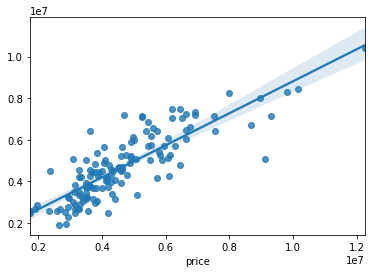

In [150]:
sns.regplot(y_test,price_pred)

In [151]:
from sklearn import metrics

In [152]:
print('MAE',metrics.mean_absolute_error(y_test,price_pred))
print('MSE',metrics.mean_squared_error(y_test,price_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,price_pred)))

MAE 717605.4932676195
MSE 939375166376.0228
RMSE 969213.6845794239


In [153]:
num1,num2,num3,num4  = 10,20,30,40

In [154]:
num1

10

In [155]:
num2

20

In [156]:
num3

30

In [157]:
num4

40